In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname =  module_path +  '/src/visualization/CharterRegular.ttf', size = 9, weight = 1000)
font_small = FontProperties(fname = module_path +  '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)
colors = ['#F94144', '#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#577590', '#277DA1']
sns.set_palette(sns.color_palette(colors))
from operator import getitem



figure_path = module_path + '/figures/small_segment_dataset_plots/'

In [2]:
performance_scores_3class = {
    'cBoss' : {'accuracy': 0.44,
              'f1_score' : 0.44 },
    'ResNet' : {'accuracy': 0.32,
              'f1_score' : 0.16},
    'WEASEL' : {'accuracy': 0.61,
              'f1_score' : 0.61 },
    'Preproject' : {'accuracy': 0.53 ,
              'f1_score' : 0.52 },
    'Preproject \n EEMD' : {'accuracy': 0.50,
              'f1_score' : 0.50},
    'CNN' : {'accuracy': 0.47, 
          'f1_score' : 0.47},
    'Catch22' : {'accuracy': 0.57 ,
          'f1_score' : 0.57  },
    'TSF' : {'accuracy':0.42,
          'f1_score' : 0.42},
    'ROCKET' : {'accuracy':0.59,
          'f1_score' : 0.59},
    'MiniROCKET' : {'accuracy':0.57,
          'f1_score' : 0.57},
    'RISE' : {'accuracy': 0.47,
        'f1_score': 0.46
    },
    'InceptionTime' : {'accuracy': 0.40,
        'f1_score': 0.23
    },
    'Deep- \n Ensemble' : {'accuracy':  0.50,
        'f1_score': 0.50
    },
    'MC \n Dropout' : {'accuracy':  0.49,
        'f1_score': 0.48
    }
}




performance_scores_2class = {
    'cBoss' : {'accuracy': 0.65,
              'f1_score' : 0.65 },
    'ResNet' : {'accuracy': 0.52,
              'f1_score' : 0.34},
    'WEASEL' : {'accuracy': 0.84,
              'f1_score' : 0.84 },
    'Preproject' : {'accuracy': 0.78 ,
              'f1_score' : 0.78 },
    'Preproject \n EEMD' : {'accuracy': 0.74,
              'f1_score' : 0.74},
    'CNN' : {'accuracy': 0.67, 
          'f1_score' : 0.67},
    'Catch22' : {'accuracy': 0.77 ,
          'f1_score' : 0.77  },
    'TSF' : {'accuracy':0.62,
          'f1_score' : 0.62},
    'ROCKET' : {'accuracy':0.77,
          'f1_score' : 0.77},
    'MiniROCKET' : {'accuracy':0.76,
          'f1_score' : 0.76},
    'RISE' : {'accuracy': 0.68,
        'f1_score': 0.68
    },
    'InceptionTime' : {'accuracy':  0.52,
        'f1_score': 0.35
    },
    'Deep- \n Ensemble' : {'accuracy':  0.74,
        'f1_score': 0.74
    },
    'MC \n Dropout' : {'accuracy': 0.69,
        'f1_score': 0.69
    }
}


color_dict = {
    'cBoss' : '#F9C74F',
    'ResNet': '#F9844A', 
    'WEASEL': '#4D908E', 
    'Preproject' : '#F94144', 
    'Preproject \n EEMD' : '#F3722C',
    'CNN' : '#90BE6D',
    'Catch22' : '#F8961E',
    'TSF' : '#43AA8B',
    'ROCKET' : '#577590',
    'MiniROCKET' : '#577590',
    'RISE' : '#277DA1', 
    'InceptionTime' : '#9d5a8a',
    'Deep- \n Ensemble' : '#be6d90',
    'MC \n Dropout' : '#f96244',
}



color_dict2 = {
    'cBoss' : '#F9C74F',
    'ResNet': '#9d5a8a', 
    'WEASEL': '#F9C74F', 
    'Preproject' : '#F3722C', 
    'Preproject \n EEMD' : '#F3722C',
    'CNN' : '#9d5a8a',
    'Catch22' : '#577590',
    'TSF' : '#43AA8B',
    'ROCKET' : '#577590',
    'RISE' : '#F3722C', 
    'InceptionTime' : '#9d5a8a',
    'MC- \n Dropout' : '#f96244',
}


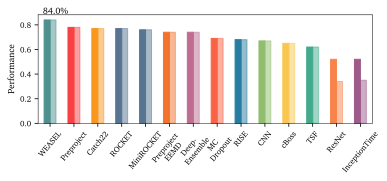

In [3]:
sorted_2class = {k: v for k, v in sorted(performance_scores_2class.items(),key=lambda x:getitem(x[1],'accuracy'), reverse = True)}
color_list = [color_dict[k] for k,v in sorted_2class.items()]
n_tsc = len(performance_scores_2class)

f, ax = plt.subplots(1,1)
f.set_size_inches(6, 2)
pd.DataFrame(sorted_2class).T.plot(kind='bar', ax = ax)

for label in ax.get_yticklabels() :
    #print(label)
    label.set_fontproperties(font_small)
    
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    label.set_rotation(50)
    
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.set_ylabel('Performance', fontproperties = font)

count = 0
for child in ax.get_children():
    if (type(child) == matplotlib.patches.Rectangle) and (count < (n_tsc*2)):
        child.set_color(color_list[count%n_tsc])
        if (count // n_tsc) > 0:
            child.set_alpha(0.5)
        count = count +1
        

maxi_flag = False
maxi = max([p.get_height() for p in ax.patches])
for i in ax.patches:
    if (i.get_height() == maxi) and not maxi_flag:
        ax.text(i.get_x()-.05, i.get_height()+.05, \
            str(round((i.get_height())*100, 2))+'%', fontproperties = font,
                color='black') 
        maxi_flag = True
        
ax.get_legend().remove()

f.savefig(figure_path + f'performance_compare_2class.pdf', bbox_inches='tight')

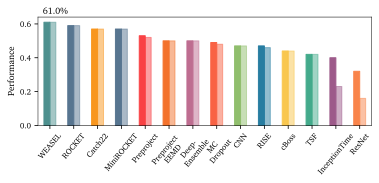

In [4]:
sorted_3class = {k: v for k, v in sorted(performance_scores_3class.items(),key=lambda x:getitem(x[1],'accuracy'), reverse = True)}
color_list = [color_dict[k] for k,v in sorted_3class.items()]
n_tsc = len(performance_scores_3class)



f, ax = plt.subplots(1,1)
f.set_size_inches(6, 2)
pd.DataFrame(sorted_3class).T.plot(kind='bar', ax = ax)

for label in ax.get_yticklabels() :
    #print(label)
    label.set_fontproperties(font_small)
    
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    label.set_rotation(50)
    
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
    
ax.set_ylabel('Performance', fontproperties = font)

count = 0
for child in ax.get_children():
    if (type(child) == matplotlib.patches.Rectangle) and (count < (2*n_tsc)):
        child.set_color(color_list[count%n_tsc])
        if (count // n_tsc) > 0:
            child.set_alpha(0.5)
        count = count +1

maxi_flag = False
maxi = max([p.get_height() for p in ax.patches])
for i in ax.patches:
    if (i.get_height() == maxi) and not maxi_flag:
        ax.text(i.get_x()-.05, i.get_height()+.05, \
            str(round((i.get_height())*100, 2))+'%', fontproperties = font,
                color='black') 
        maxi_flag = True

ax.get_legend().remove()

f.savefig(figure_path + f'performance_compare_3class.pdf', bbox_inches='tight')